In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
main_path = '/Users/henriquevieira/Documents/escola_blue/materiais/Aula 4/'

In [3]:
dados = pd.read_csv(os.path.join(main_path, 'exemplo_peso_altura_animais_fazenda.csv'), 
                    delimiter=';')
dados

,peso,altura
0,2.4,0.80
1,102.0,0.70
2,430.0,1.50
3,306.0,1.57
4,2.9,0.73
5,131.0,0.85
6,280.0,1.40
7,318.0,1.60
8,110.0,0.80


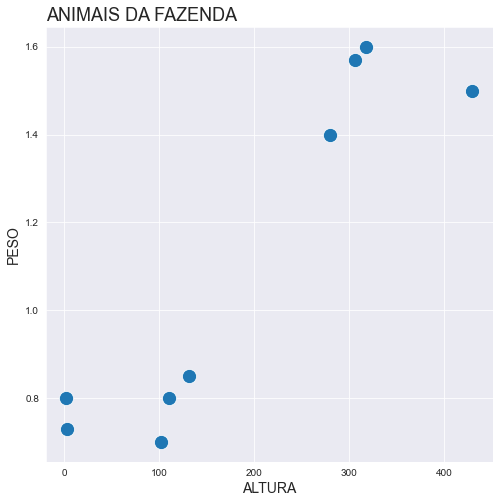

In [4]:
sns.set_style('darkgrid')

plt.figure(figsize=[8,8])
ax = sns.scatterplot(x='peso', y='altura', s = 200,
                     data=dados, 
                     palette="deep")
ax.set_title('ANIMAIS DA FAZENDA', loc='left', fontsize=18)
ax.set_xlabel('ALTURA', fontsize=14)
ax.set_ylabel('PESO', fontsize=14)
plt.show()

In [5]:
# Baseado nesse material
# https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/

In [6]:
# Passos do nosso algoritmo
# Select the k values.
# Initialize the centroids.
# Select the group and find the average.

Observando o nosso grafico podemos afirmar que há dois grupos, então k = 2. Iniciaremos dois centroides em posições definidas, (250, 1.0) e (200, 1.6)

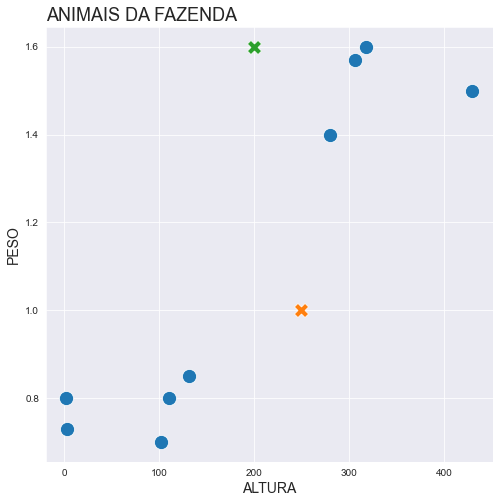

In [7]:
sns.set_style('darkgrid')

plt.figure(figsize=[8,8])
ax = sns.scatterplot(x='peso', y='altura', s = 200,
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[250], y=[1], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[200], y=[1.6], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax.set_title('ANIMAIS DA FAZENDA', loc='left', fontsize=18)
ax.set_xlabel('ALTURA', fontsize=14)
ax.set_ylabel('PESO', fontsize=14)

plt.savefig(os.path.join(main_path, 'scatterplot_kmeans_animais_fazenda1.png'))

In [8]:
# Calcular a distancia entre todos os pontos e cada centroide

Vamos calcular a distancia do primeiro ponto (2.4, 0.8) ate o primeiro centroide (250, 1.0)

In [9]:
Xa, Ya, Xb, Yb = 2.4, 0.80, 250, 1.0

In [10]:
distancia_euclidiana = np.sqrt( np.power(Xb - Xa, 2) + np.power(Yb - Ya, 2))
distancia_euclidiana

247.60008077543108

In [11]:
# Vamos escrever essa funcao
def calcular_distancia_euclidiana(Xa, Ya, Xb, Yb):
    distancia_euclidiana = np.sqrt( np.power(Xb - Xa, 2))
    return distancia_euclidiana

In [12]:
calcular_distancia_euclidiana(Xa, Ya, Xb, Yb)

247.6

In [13]:
centroide_1  = (250, 1.0)
Xb, Yb       = centroide_1 
dist_centr_1 = [calcular_distancia_euclidiana(Xa, Ya, Xb, Yb) for i, Xa, Ya in dados.itertuples()]
dist_centr_1

[247.6, 148.0, 180.0, 56.0, 247.1, 119.0, 30.0, 68.0, 140.0]

In [14]:
centroide_2  = (200, 1.6)
Xb, Yb       = centroide_2 
dist_centr_2 = [calcular_distancia_euclidiana(Xa, Ya, Xb, Yb) for i, Xa, Ya in dados.itertuples()]
dist_centr_2

[197.6, 98.0, 230.0, 106.0, 197.1, 69.0, 80.0, 118.0, 90.0]

In [15]:
dist_centroides = np.array([dist_centr_1, dist_centr_2])
dist_centroides

array([[247.6, 148. , 180. ,  56. , 247.1, 119. ,  30. ,  68. , 140. ],
       [197.6,  98. , 230. , 106. , 197.1,  69. ,  80. , 118. ,  90. ]])

In [16]:
dist_centroides.shape

(2, 9)

In [17]:
# Atribuir cada ponto a um centroide/cluster

In [18]:
clusters = []
for i in range(dist_centroides.shape[1]):
    cluster = np.argmin(dist_centroides[:, i])
    clusters.append(cluster)
clusters

[1, 1, 0, 0, 1, 1, 0, 0, 1]

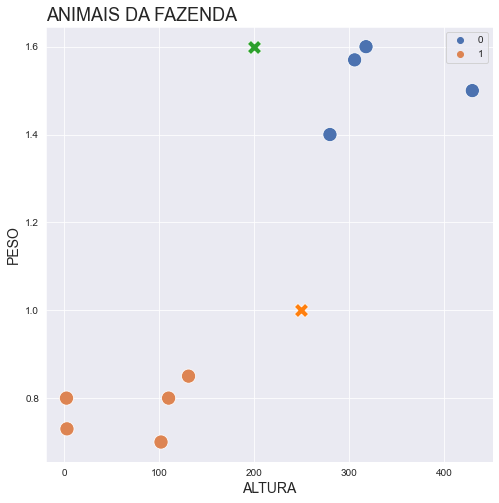

In [19]:
sns.set_style('darkgrid')

plt.figure(figsize=[8,8])
ax = sns.scatterplot(x='peso', y='altura', hue=clusters, s = 200,
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[250], y=[1], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[200], y=[1.6], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax.set_title('ANIMAIS DA FAZENDA', loc='left', fontsize=18)
ax.set_xlabel('ALTURA', fontsize=14)
ax.set_ylabel('PESO', fontsize=14)
plt.savefig(os.path.join(main_path, 'scatterplot_kmeans_animais_fazenda2.png'))

In [20]:
# Recalcular os centroides a partir da media dos clusters

In [21]:
dados['cluster'] = clusters
for cluster in np.unique(clusters):
    
    X = dados[dados['cluster'] == cluster]['peso'].mean()
    Y = dados[dados['cluster'] == cluster]['altura'].mean()
    print('centroide_'+str(cluster), X, Y)

centroide_0 333.5 1.5175
centroide_1 69.66 0.776


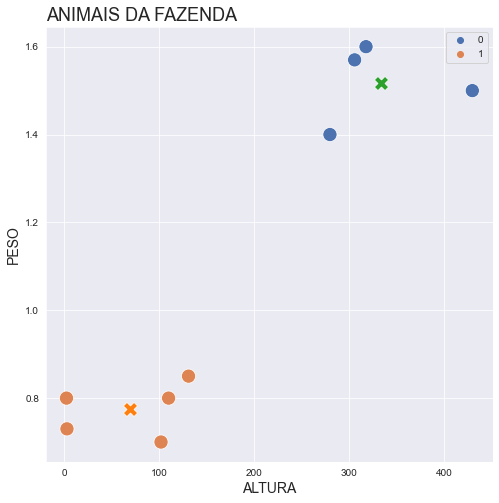

In [22]:
sns.set_style('darkgrid')

plt.figure(figsize=[8,8])
ax = sns.scatterplot(x='peso', y='altura', hue=clusters, s = 200,
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[69.66], y=[0.776], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[333.5], y=[1.5175], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax.set_title('ANIMAIS DA FAZENDA', loc='left', fontsize=18)
ax.set_xlabel('ALTURA', fontsize=14)
ax.set_ylabel('PESO', fontsize=14)
plt.savefig(os.path.join(main_path, 'scatterplot_kmeans_animais_fazenda3.png'))

In [23]:
centroide_0 = (333.5, 1.5175)
centroide_1 = (69.66, 0.776)
centroides = [centroide_0, centroide_1]

Repetimos novamente os passos anteriores, mas iremos fazer uma funcao para não repetir diversas vezes

In [24]:
def definir_clusters(dados, centroides):
    
    dist_centroides = []
    clusters        = []
    for centroide in centroides:

        Xb, Yb          = centroide
        dist_centroides.append([calcular_distancia_euclidiana(Xa, Ya, Xb, Yb) for i, Xa, Ya, c in dados.itertuples()]) 
    dist_centroides = np.array(dist_centroides)
    
    for i in range(dist_centroides.shape[1]):
        cluster = np.argmin(dist_centroides[:, i])
        clusters.append(cluster)
    
    return clusters

In [25]:
clusters = definir_clusters(dados, centroides)
clusters

[1, 1, 0, 0, 1, 1, 0, 0, 1]

In [26]:
dados['cluster'] = clusters

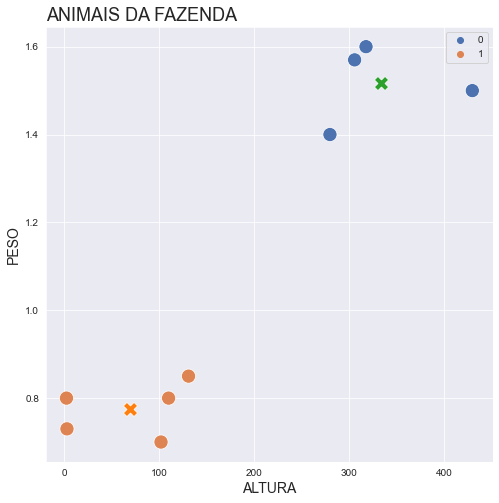

In [27]:
sns.set_style('darkgrid')

plt.figure(figsize=[8,8])
ax = sns.scatterplot(x='peso', y='altura', hue=clusters, s = 200,
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[centroide_1[0]], y=[centroide_1[1]], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax = sns.scatterplot(x=[centroide_0[0]], y=[centroide_0[1]], s = 200, marker="X",
                     data=dados, 
                     palette="deep")
ax.set_title('ANIMAIS DA FAZENDA', loc='left', fontsize=18)
ax.set_xlabel('ALTURA', fontsize=14)
ax.set_ylabel('PESO', fontsize=14)
plt.savefig(os.path.join(main_path, 'scatterplot_kmeans_animais_fazenda4.png'))